# Import 

In [0]:
import pandas as pd
import tensorflow
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, TimeDistributed, Dense,Dropout,Activation
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.utils import *
import math
import time
import matplotlib.pyplot as plt

/home/ubuntu/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Read Date

In [0]:
df = pd.read_csv('data/2330+Us.csv' , encoding='big5')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1661 entries, 0 to 1660
Data columns (total 21 columns):
Date         1661 non-null object
Open         1661 non-null float64
High         1661 non-null float64
Low          1661 non-null float64
Close        1661 non-null float64
SMA5         1661 non-null float64
SMA10        1661 non-null float64
SMA20        1661 non-null float64
SMA60        1661 non-null float64
Vol          1661 non-null int64
MA5          1661 non-null int64
MA10         1661 non-null int64
DIF          1661 non-null float64
MACD9        1661 non-null float64
OSC          1661 non-null float64
K            1661 non-null object
D            1661 non-null object
S_P500       1661 non-null float64
SOXX         1661 non-null float64
ADR          1661 non-null float64
TaiwanAll    1661 non-null float64
dtypes: float64(15), int64(3), object(3)
memory usage: 272.6+ KB


In [0]:
df = pd.read_csv('data/2330+Us.csv' , encoding='big5')

In [0]:
df.tail(10)

,Date,Open,High,Low,Close,SMA5,SMA10,SMA20,SMA60,Vol,...,MA10,DIF,MACD9,OSC,K,D,S_P500,SOXX,ADR,TaiwanAll
1651,2018/3/31,247.5,249.0,246.5,247.5,246.7,247.90,250.55,246.70,3604,...,29283,-0.18,0.63,-0.82,34.38%,33.22%,2640.87,1328.90,43.759998,10919.49
1652,2018/4/2,248.5,249.0,245.0,246.5,245.8,247.25,250.38,247.04,19029,...,28952,-0.28,0.45,-0.73,35.74%,34.06%,2640.87,1328.90,43.759998,10888.27
1653,2018/4/3,243.0,244.5,242.0,244.0,245.6,246.40,250.23,247.28,35814,...,29236,-0.60,0.24,-0.84,32.60%,33.57%,2581.88,1277.01,42.500000,10821.53
1654,2018/4/9,248.0,248.0,243.5,245.0,245.8,245.75,250.00,247.49,35466,...,30082,-0.70,0.05,-0.76,34.01%,33.72%,2614.45,1302.09,43.480000,10893.53
1655,2018/4/10,244.5,249.0,243.5,245.5,245.7,245.80,249.75,247.63,25269,...,27312,-0.74,-0.11,-0.63,35.64%,34.36%,2613.16,1273.80,43.070000,10927.18
1656,2018/4/11,246.5,248.5,246.5,248.0,245.8,246.25,249.45,247.78,21778,...,25541,-0.61,-0.21,-0.40,50.43%,39.72%,2656.87,1314.54,43.580002,10974.02
1657,2018/4/12,248.5,248.5,244.0,245.0,245.5,245.65,248.75,247.86,20477,...,24478,-0.67,-0.30,-0.37,46.95%,42.13%,2642.19,1315.06,43.380001,10955.29
1658,2018/4/13,246.0,246.0,244.0,244.5,245.6,245.60,248.13,247.90,19947,...,23481,-0.78,-0.39,-0.38,42.41%,42.22%,2663.99,1339.66,43.849998,10965.39
1659,2018/4/16,243.0,244.0,242.0,243.5,245.3,245.55,247.55,247.93,21609,...,21999,-0.97,-0.51,-0.46,35.42%,39.95%,2656.30,1329.40,42.650002,10954.55
1660,2018/4/17,243.0,243.5,237.5,238.0,243.8,244.75,246.70,247.95,42756,...,24575,-1.43,-0.70,-0.74,25.06%,34.99%,2677.84,1332.52,42.869999,10810.45


In [0]:
def batch_data( time_steps,sd,batch_size,feature_list):

    df = pd.read_csv('data/2377.csv' , encoding='big5')

    df['RSI6'] = df['RSIx6'].str.replace('%','').astype('float') 
    df['RSI6'] = df['RSI6'] * 0.01
    df['RSI12'] = df['RSIx12'].str.replace('%','').astype('float') 
    df['RSI12'] = df['RSI12'] * 0.01
    
    

    df['K'] = df['K'].str.replace('%','').astype('float')
    df['K'] = df['K'] * 0.01
    
    df['D'] = df['D'].str.replace('%','').astype('float')
    df['D'] = df['D'] * 0.01

    df['Vol']= df['Vol'].astype('float')
    df['Open'] = df['Open'].astype('float')
    df['High'] = df['High'].astype('float')
    df['Low'] = df['Low'].astype('float')
    df['Close'] = df['Close'].astype('float')
    df['SMA5'] = df['SMA5'].astype('float')
    df['SMA10'] = df['SMA10'].astype('float')
    df['SMA20'] = df['SMA20'].astype('float')
    df['SMA60'] = df['SMA60'].astype('float')
    df['MA5'] = df['MA5'].astype('float')
    df['MA10'] = df['MA10'].astype('float')
    
    

    close = df['Close']
    s = 0.07
    df['three']=((close.shift(-1)-close)/close>s).astype('int')
    df['three']=((close.shift(-2)-close)/close>s).astype('int')
    df['three']=((close.shift(-3)-close)/close>s).astype('int')
    df['four']=((close.shift(-4)-close)/close>s).astype('int')
    df['five']=((close.shift(-5)-close)/close>s).astype('int')
    df['six']=((close.shift(-6)-close)/close>s).astype('int')
    df['seven']=((close.shift(-7)-close)/close>s).astype('int')
    df['eight']=((close.shift(-8)-close)/close>s).astype('int')
    df['nine']=((close.shift(-9)-close)/close>s).astype('int')
    df['ten']=((close.shift(-10)-close)/close>s).astype('int')
    df['eleven']=((close.shift(-11)-close)/close>s).astype('int')
    df['twelve']=((close.shift(-12)-close)/close>s).astype('int')
    df['thirteen']=((close.shift(-13)-close)/close>s).astype('int')
    df['fourteen']=((close.shift(-14)-close)/close>s).astype('int')
    
    df['label'] = df['three']+df['four']+df['five']+df['six']+df['seven']+df['eight']+df['nine']+df['ten']+df['eleven']
    df['label'] = (df['label']>0).astype('int')

    Y =df['label']
    Y = np_utils.to_categorical(Y)

    X = df[feature_list]
    

    Y = np.array(Y)
    X = np.array(X)
    
    m = MinMaxScaler(feature_range=(0,1))
    X=m.fit_transform(X)

    X_t = []
    Y_t = []
    
    
    
    
    for i in range(0, X.shape[0] - time_steps):
        

        X_t.append(X[i:i+time_steps])
        Y_t.append(Y[i+time_steps])
    X_t = np.array(X_t)
    Y_t = np.array(Y_t)
    
    dn = X_t.shape[0]%batch_size
    X_t = X_t[dn:]
    Y_t = Y_t[dn:]
    
    
      
    
    X_t_batch_train=X_t[:-batch_size]
    Y_t_batch_train=Y_t[:-batch_size]

    X_t_batch_test=X_t[-batch_size:]
    Y_t_batch_test=Y_t[-batch_size:]
    return X_t_batch_train,Y_t_batch_train,X_t_batch_test,Y_t_batch_test,df
    
    

In [0]:
df.head()

,Date,Open,High,Low,Close,SMA5,SMA10,SMA20,SMA60,Vol,...,MA10,DIF,MACD9,OSC,K,D,S_P500,SOXX,ADR,TaiwanAll
0,2011/7/20,69.7,71.7,69.4,71.6,70.08,70.83,71.79,74.02,58272,...,55917,-1.15,-1.00,-0.15,32.35%,26.05%,1326.73,397.41,12.22,8706.17
1,2011/7/21,71.4,71.6,70.6,71.6,70.26,70.83,71.66,74.05,33277,...,54470,-1.04,-1.01,-0.03,46.77%,32.96%,1325.84,395.11,12.47,8717.14
2,2011/7/22,72.4,72.4,71.7,72.0,70.68,70.78,71.62,74.04,38244,...,52998,-0.88,-0.98,0.10,60.35%,42.09%,1343.80,398.88,12.57,8765.32
3,2011/7/25,72.4,72.5,71.4,72.0,71.14,70.85,71.62,74.02,34963,...,51283,-0.76,-0.94,0.18,69.40%,51.19%,1345.02,408.56,12.98,8683.51
4,2011/7/26,72.3,73.7,72.3,73.7,72.18,71.19,71.68,74.03,53159,...,52599,-0.54,-0.86,0.32,79.60%,60.66%,1337.43,403.08,12.75,8794.24


In [0]:
df.shape

(1661, 21)

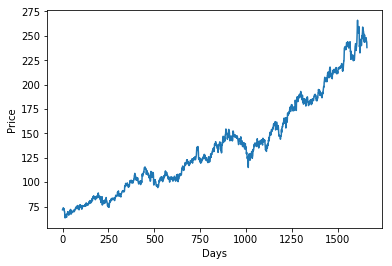

In [0]:
#dates = pd.to_datetime(df['Date'] , format='%Y%m%d')
plt.plot(df['Close'])
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

In [0]:
batch_size= 128
LR= 0.005
epoch= 1000
input_size= 6
time_steps= 6
# sd = -3

In [0]:
# feature_list_try = ['SMA5', 'SMA10', 'SMA20',
#        'SMA60', 'MA5', 'MA10', 'DIF', 'MACD9', 'OSC', 'K', 'D','S_P500','SOXX','ADR']
# feature_list_try = ['S_P500','SOXX','ADR','RSI6','RSI12']
# feature_list_try = ['RSI6','TaiwanAll','RSI12','SMA5','MA5']
# feature_list_try = ['TaiwanAll','RSI6','RSI12','SMA5','MA5']

In [ ]:


feature_list = ['Open', 'High', 'Low', 'Close','Vol','SMA5','MA5']
input_size=len(feature_list)
model =Sequential()
model.add(LSTM(
            batch_input_shape=(batch_size,time_steps,input_size),
            output_dim=256,
            return_sequences=True,
            stateful=False,
        ))
model.add(Dropout(0.6))
model.add(LSTM(
        output_dim=128,
            return_sequences=False,
            stateful=False,
         ))
model.add(Dropout(0.6))
model.add(Dense(256))
model.add(Dropout(0.4))
model.add(Dense(128))
model.add(Dropout(0.4))
model.add(Dense(64))
model.add(Dropout(0.4))
model.add(Dense(2,activation='softmax'))
adam = Adam(LR)
#     model.summary()
model.compile(optimizer=adam,
                  loss='categorical_crossentropy',metrics=['accuracy'])
X_t_batch_train,Y_t_batch_train,X_t_batch_test,Y_t_batch_test,df=batch_data(time_steps,-sd,batch_size,feature_list)
train_history=model.fit(X_t_batch_train, Y_t_batch_train, epochs=epoch, batch_size=batch_size,verbose=0,validation_data=(X_t_batch_test,Y_t_batch_test),shuffle=True)

score = model.evaluate(X_t_batch_train,Y_t_batch_train, verbose=1,batch_size=128)
print('train_score:', score)
score = model.evaluate(X_t_batch_test,Y_t_batch_test, verbose=1,batch_size=128)
print('test_score:', score)

In [0]:
df = pd.read_csv('data/2330+Us.csv' , encoding='big5')
df_val = df[-batch_size:]

In [0]:
predictions = Y_t_batch_test[:,1]

In [0]:
df_val.iloc[0]

Date         2017/10/3
Open               219
High               223
Low                219
Close            222.5
SMA5               218
SMA10           217.55
SMA20            218.2
SMA60           215.86
Vol              38331
MA5              25303
MA10             23488
DIF               0.66
MACD9             0.61
OSC               0.05
K               59.02%
D               41.23%
S_P500         2534.58
SOXX           1182.43
ADR              38.44
TaiwanAll      10469.4
Name: 1533, dtype: object

In [0]:
holding = 0

trade_record=[]
profit=[]
for i in range(len(predictions)):
    prediction = predictions[i]
    price = float(df_val.iloc[i]['Close'])
    K = float(df_val.iloc[i]['K'].replace('%',''))
    D = float(df_val.iloc[i]['D'].replace('%',''))
#     RSI = float(df_val.iloc[i]['RSIx6'].replace('%',''))
    
    if holding == 0:
        if prediction ==1 or (K<30 and D<30)  :
            p_d = [price,i,'BUY']
            trade_record.append(p_d)
            holding=1
            continue
    if holding ==1:
        last_trade = trade_record[-1]
        if last_trade[2]=='BUY':
            buy_price=last_trade[0]
            buy_i = last_trade[1]
            if (price/buy_price-1)>0.07 or i-buy_i>=14  or (K>70 and D>70) :
                print('++++++')
                print(i-buy_i)
#                 print((buy_i-i))eleven
                p_d_s=[price,i,'SELL']
                trade_record.append(p_d_s)
                holding=0
                profit.append(price-buy_price)

----
59.02 41.23
++++++
4
----
92.86 80.88
++++++
1
----
53.1 62.79
++++++
14
----
25.97 29.62
++++++
14
----
45.57 44.18
++++++
7
----
84.47 85.36
++++++
1
----
66.74 76.63
++++++
2
----
78.82 75.5
++++++
1
----
88.68 81.57
++++++
1
----
94.59 88.2
++++++
1
----
32.68 45.63
++++++
14
----
80.39 71.56
++++++
1
----
89.94 80.65
++++++
1
----
86.15 84.57
++++++
1
----
77.0 81.23
++++++
14


In [0]:
sum(profit)

34.0

In [0]:
trade_record

[[222.5, 0, 'BUY'],
 [237.5, 4, 'SELL'],
 [237.5, 5, 'BUY'],
 [238.0, 6, 'SELL'],
 [239.0, 15, 'BUY'],
 [238.0, 29, 'SELL'],
 [229.5, 42, 'BUY'],
 [228.5, 56, 'SELL'],
 [226.0, 57, 'BUY'],
 [240.0, 64, 'SELL'],
 [236.5, 67, 'BUY'],
 [235.0, 68, 'SELL'],
 [237.0, 69, 'BUY'],
 [240.5, 71, 'SELL'],
 [242.0, 72, 'BUY'],
 [248.5, 73, 'SELL'],
 [255.5, 74, 'BUY'],
 [261.5, 75, 'SELL'],
 [266.0, 76, 'BUY'],
 [258.0, 77, 'SELL'],
 [239.0, 86, 'BUY'],
 [247.0, 100, 'SELL'],
 [250.5, 102, 'BUY'],
 [254.0, 103, 'SELL'],
 [259.0, 104, 'BUY'],
 [257.0, 105, 'SELL'],
 [255.0, 106, 'BUY'],
 [255.0, 107, 'SELL'],
 [255.0, 108, 'BUY'],
 [245.5, 122, 'SELL']]

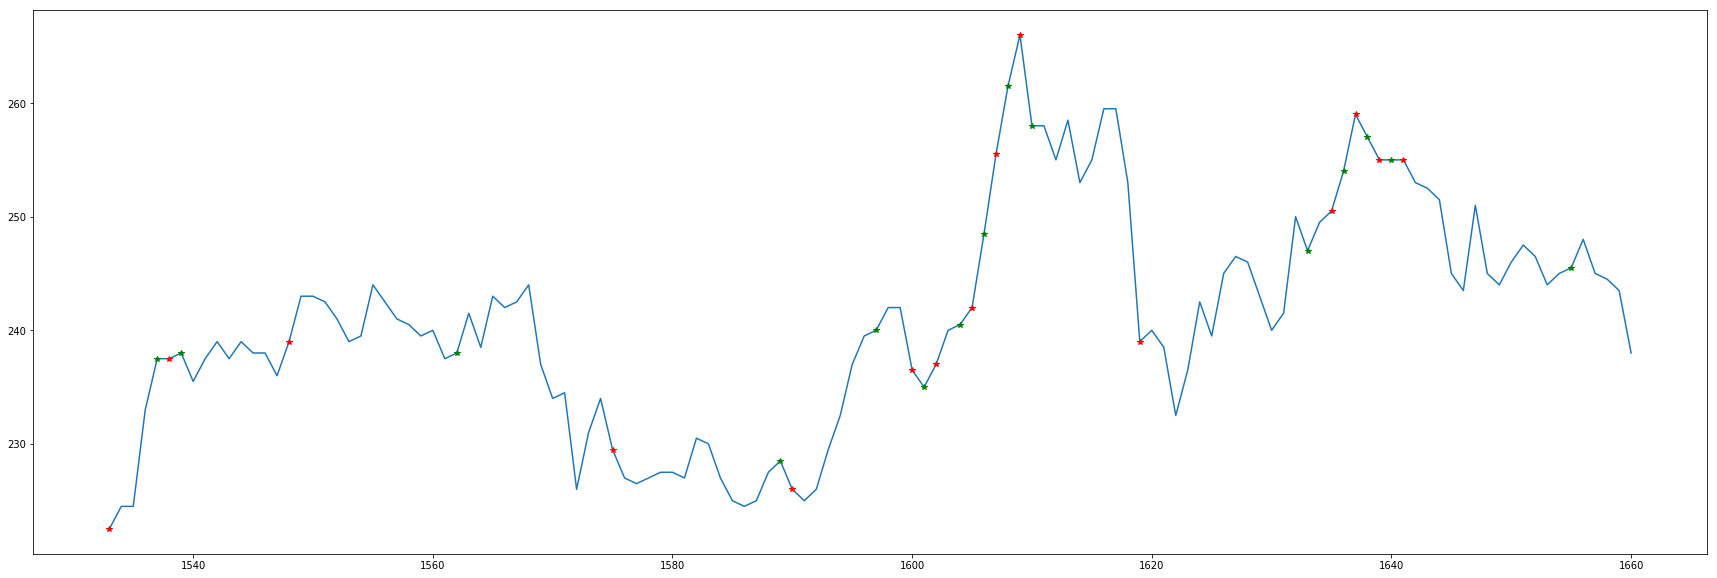

In [0]:
start = df_val['Close'].index[0]
plt.figure(figsize = (30,10))
plt.plot(df_val['Close'])
for i in trade_record:
    x=i[1]+start
    y = i[0]
    action = i[2]
    if action=='BUY':
        plt.plot(x,y,color='red',marker='*')
    else:
        plt.plot(x,y,color='green',marker='*')